Author: Sakari Hakala  
Course: Communication Data Science Results, University of Washington, Bill Howe  
Assignment owerview: https://github.com/uwescience/datasci_course_materials/blob/master/assignment6/crimeanalytics.md

# Crime Data Analysis for the City of San Francisco

Lets start with loading the data in and taking a peak at it. Also we drop few columns not needed and create some new.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

# Read data and parse DateTime
path = "./datasci_course_materials/assignment6/"
parse = lambda x: datetime.strptime(x, '%Y%m%d %H%M')
data = pd.read_csv(path + "sanfrancisco_incidents_summer_2014.csv", parse_dates = [['Date', 'Time']], index_col = 0)

# Drop extra columns and modify the ones we use
data.Category = data['Category'].astype('category')
data.DayOfWeek = data['DayOfWeek'].astype('category')
data.drop(['Resolution', 'Address', 'X', 'Y', 'Location', 'PdId'],axis=1, inplace=True)

def timeOfDay(datetime):
    hour = datetime
    if hour in range(6,12):
        return 'Morning'
    if hour in range(12,18):
        return 'Day'
    if hour in range(18,24):
        return 'Evening'
    else:
        return 'Night'

# Create few extra columns
data['TimeOfDay'] = map(timeOfDay, data.index.hour)
data['Date'] = data.index.date.astype('datetime64')
data['Hour'] = data.index.hour
data.head()

,IncidntNum,Category,Descript,DayOfWeek,PdDistrict,TimeOfDay,Date,Hour
Date_Time,,,,,,,,
2014-08-31 23:50:00,140734311,ARSON,ARSON OF A VEHICLE,Sunday,BAYVIEW,Evening,2014-08-31,23
2014-08-31 23:45:00,140736317,NON-CRIMINAL,LOST PROPERTY,Sunday,MISSION,Evening,2014-08-31,23
2014-08-31 23:30:00,146177923,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,SOUTHERN,Evening,2014-08-31,23
2014-08-31 23:30:00,146177531,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,RICHMOND,Evening,2014-08-31,23
2014-08-31 23:23:00,140734220,NON-CRIMINAL,FOUND PROPERTY,Sunday,RICHMOND,Evening,2014-08-31,23


In this assignment I am trying to answer questions
* Does the weekdays influence to the number of crimes done?
* Does the time of day influence to the number of crimes done?
* Is the number of crimes steady during the Summer 2014?

Next we got three plots, all having number of crimes at the y-axis. On the left plot we have grouped by hour of the day the crime have happened. As we can see during night hours crimes are committed less and counts are raising when approaching 6pm. On the middle plot are counts are grouped by weekdays, and as one can see less crimes are done Tuesday-Thursday and slightly more on weekends. Mondays high count could be explained by some crimes happened during weekend and noticed later. Last plot is graph with daily counts on crimes. There is a lot of variation on those counts, as maximum value is almost twice as much as the minumum was. Also two clear peaks arise from the plot, June 28-29th and August 08-09th, when daily count rises over 400. After little googling I found out that in both cases were some major festival happening in San Francisco. Maybe it is just coincidence.

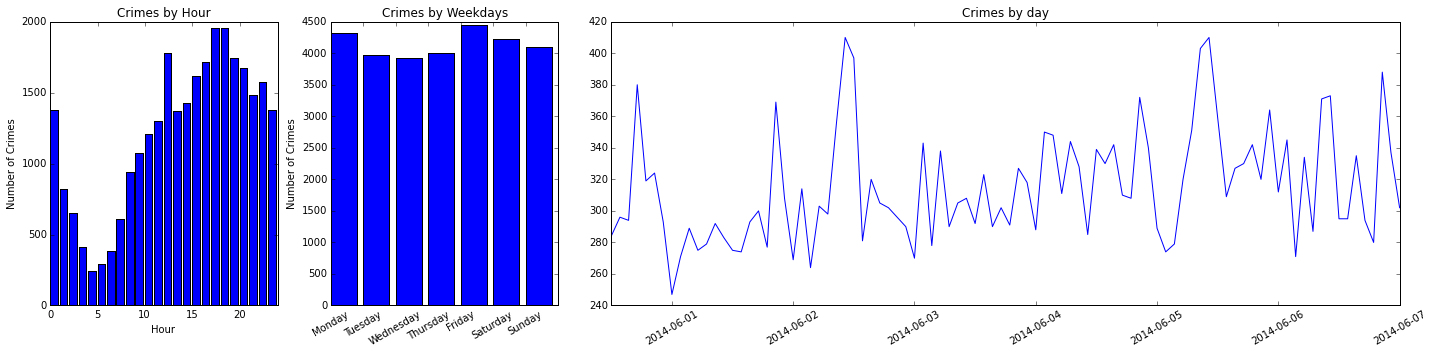

In [3]:
fig = plt.figure(figsize=(20,5))
#ax1 = fig.add_subplot(151)

ax1 = plt.subplot2grid((1,5),(0,0))
hourly_values = data.Hour.value_counts().sort_index()
ax1.bar(range(24), hourly_values)
ax1.set_title('Crimes by Hour')
ax1.set_ylabel('Number of Crimes')
ax1.set_xlabel('Hour')
ax1.set_xbound(0,24)

#ax2 = fig.add_subplot(152)
ax2 = plt.subplot2grid((1,5),(0,1))
day_values = data.DayOfWeek.value_counts().tolist()
days = data.DayOfWeek.cat.categories.tolist()
ordered_day_values = []
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for day in order:
    idx = days.index(day)
    ordered_day_values.append(day_values[idx])

ax2.bar(range(7), ordered_day_values)
ax2.set_xticklabels(order, rotation=30)
ax2.set_title('Crimes by Weekdays')
ax2.set_ylabel('Number of Crimes')

#ax3 = fig.add_subplot(153, colspan=3)
ax3 = plt.subplot2grid((1,5), (0,2), colspan=3)
crimes_by_date = data.Date.value_counts().sort_index()
ax3.plot(crimes_by_date.index, crimes_by_date)
ax3.set_xticklabels(crimes_by_date.index.date,rotation=30)
ax3.set_title('Crimes by day')

fig.tight_layout()
fig.show()

Next we will be studying how weekday will influence to the distribution of crimes along time. First we make pivot table to illustrade the numbers and then plot some pie plots. As we can see the percentage of crimes done at night (00-06) comes up when moving towards the weekend and morning (06-12) goes down. That seems reasonable as peoples rhythm of live is different during weekdays and weekends.

In [4]:
time_day_table = pd.pivot_table(data, index=['TimeOfDay'], columns=['DayOfWeek'], aggfunc=len, fill_value=0)['Descript']
time_day_table = time_day_table.reindex(columns=order, index=['Night', 'Morning','Day','Evening'])
time_day_table['Total'] = time_day_table.sum(1)
time_day_table

DayOfWeek,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Total
TimeOfDay,,,,,,,,
Night,439,423,480,501,527,679,757,3806
Morning,846,830,908,731,854,697,652,5518
Day,1400,1356,1351,1399,1490,1393,1470,9859
Evening,1320,1321,1363,1337,1580,1550,1339,9810


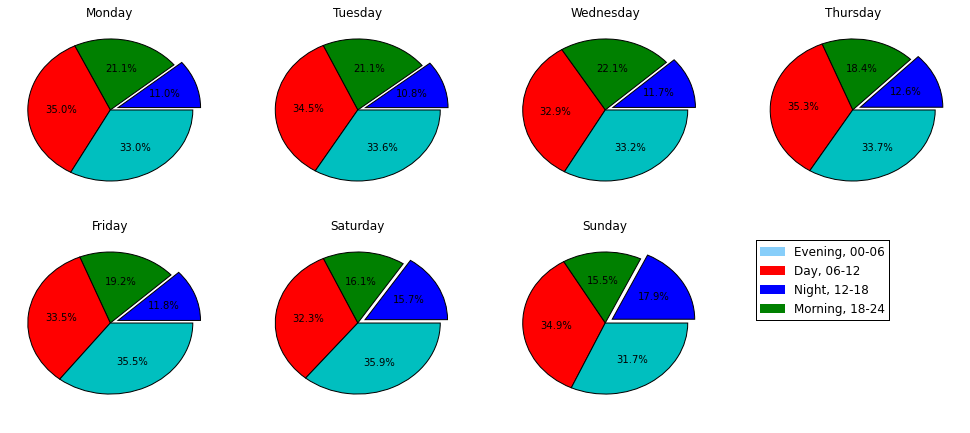

In [11]:
import matplotlib.patches as mpatches

fig = plt.figure(figsize=(17,7))

ax1 = fig.add_subplot(241)
ax1.pie(time_day_table['Monday'], autopct='%1.1f%%', explode = (0.1, 0, 0, 0))
ax1.set_title('Monday')

ax2 = fig.add_subplot(242)
ax2.pie(time_day_table['Tuesday'], autopct='%1.1f%%', explode = (0.1, 0, 0, 0))
ax2.set_title('Tuesday')

ax3 = fig.add_subplot(243)
ax3.pie(time_day_table['Wednesday'], autopct='%1.1f%%', explode = (0.1, 0, 0, 0))
ax3.set_title('Wednesday')

ax4 = fig.add_subplot(244)
ax4.pie(time_day_table['Thursday'], autopct='%1.1f%%', explode = (0.1, 0, 0, 0))
ax4.set_title('Thursday')

ax5 = fig.add_subplot(245)
ax5.pie(time_day_table['Friday'], autopct='%1.1f%%', explode = (0.1, 0, 0, 0))
ax5.set_title('Friday')

ax6 = fig.add_subplot(246)
ax6.pie(time_day_table['Saturday'], autopct='%1.1f%%', explode = (0.1, 0, 0, 0))
ax6.set_title('Saturday')

ax7 = fig.add_subplot(247)
ax7.pie(time_day_table['Sunday'], autopct='%1.1f%%', explode = (0.1, 0, 0, 0))
ax7.set_title('Sunday')

lightskyblue_patch = mpatches.Patch(color='lightskyblue', label='Evening, 00-06')
red_patch = mpatches.Patch(color='red', label='Day, 06-12')
blue_patch = mpatches.Patch(color='blue', label='Night, 12-18')
green_patch = mpatches.Patch(color='green', label='Morning, 18-24')

ax8 = fig.add_subplot(248)
ax8.axis('off')
ax8.legend(handles=[lightskyblue_patch, red_patch, blue_patch, green_patch], loc = 'upper left')


Which crimes do happen more frequently on weekends than in weekdays. Lets create a pivot table from data and focus only categories with total over 1000 incidents (there is 9 of those). From this table we can see that some crimes are more usual on weekends, as Larceny/theft, but with most categories there seems to be no trend. Lets look this also in plot.

In [7]:
table = pd.pivot_table(data, index=['Category'], columns=['DayOfWeek'], aggfunc=len, fill_value=0)['Descript']
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
table = table.reindex(columns = order)
table['Total'] = table.sum(axis=1)
table = table.sort(columns='Total', ascending=False)
table[:9]

DayOfWeek,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Total
Category,,,,,,,,
LARCENY/THEFT,1233,1237,1228,1235,1445,1583,1505,9466
OTHER OFFENSES,496,536,522,526,547,507,433,3567
NON-CRIMINAL,440,404,418,393,468,455,445,3023
ASSAULT,406,356,379,387,440,452,462,2882
VEHICLE THEFT,288,225,291,270,297,281,314,1966
WARRANTS,241,286,293,257,255,238,212,1782
DRUG/NARCOTIC,193,209,216,218,208,145,156,1345
SUSPICIOUS OCC,181,194,212,200,188,155,170,1300
MISSING PERSON,206,150,203,148,219,158,182,1266


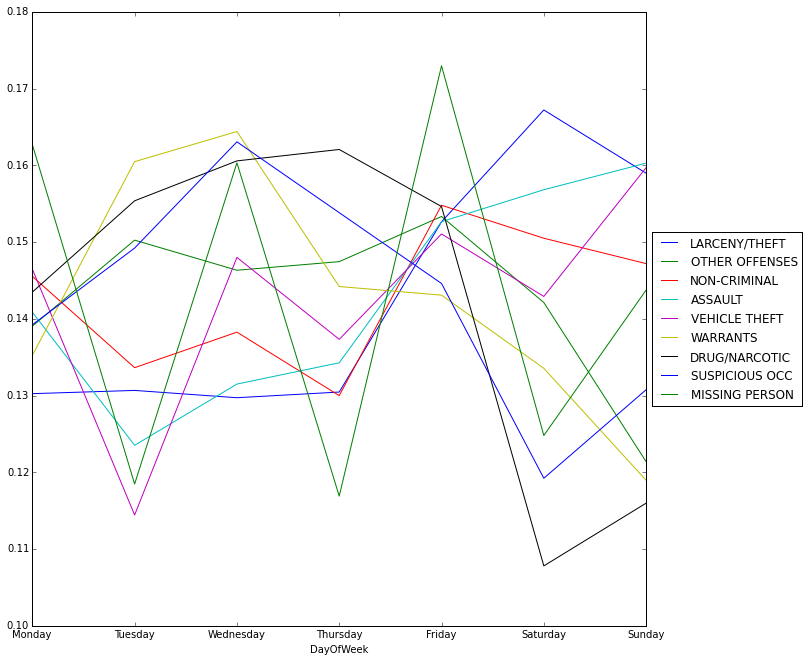

In [8]:
table3 = table.drop('Total', axis=1).apply(lambda x: x / x.sum(), axis=1)
table3[:9].transpose().plot(figsize=(11,11)).legend(loc='center left',  bbox_to_anchor=(1, 0.5))